In [3]:
import numpy as np
from pandas import read_csv
df= read_csv('forestfires.csv')

In [4]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [6]:
df.drop(df.columns[11:30], axis=1, inplace=True)

In [7]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,small


In [8]:
from sklearn.preprocessing import LabelEncoder

In [9]:
le = LabelEncoder()
df['month'] = le.fit_transform(df['month'])
df['day'] = le.fit_transform(df['day'])
df['size_category'] = le.fit_transform(df['size_category'])

In [10]:
df.head()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
0,7,0,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0,1
1,10,5,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0,1
2,10,2,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0,1
3,7,0,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0,1
4,7,3,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0,1


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    int64  
 1   day            517 non-null    int64  
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  size_category  517 non-null    int64  
dtypes: float64(8), int64(4)
memory usage: 48.6 KB


In [12]:
#removing bias in the dataset

from imblearn.combine import SMOTETomek
from collections import Counter

resamp = df.copy()
#SMOTEK TECHNIQUE

#Define dataset
a = resamp.iloc[:,:-1]
b = resamp.iloc[:,-1]

#Count before
print(Counter(b))

smt = SMOTETomek(sampling_strategy = 'auto')
a, b = smt.fit_resample(a, b)

#Count after
print(Counter(b)) #removed bias in dataset

Counter({1: 378, 0: 139})
Counter({1: 369, 0: 369})


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

In [14]:
#sns.pairplot(df)

<Axes: >

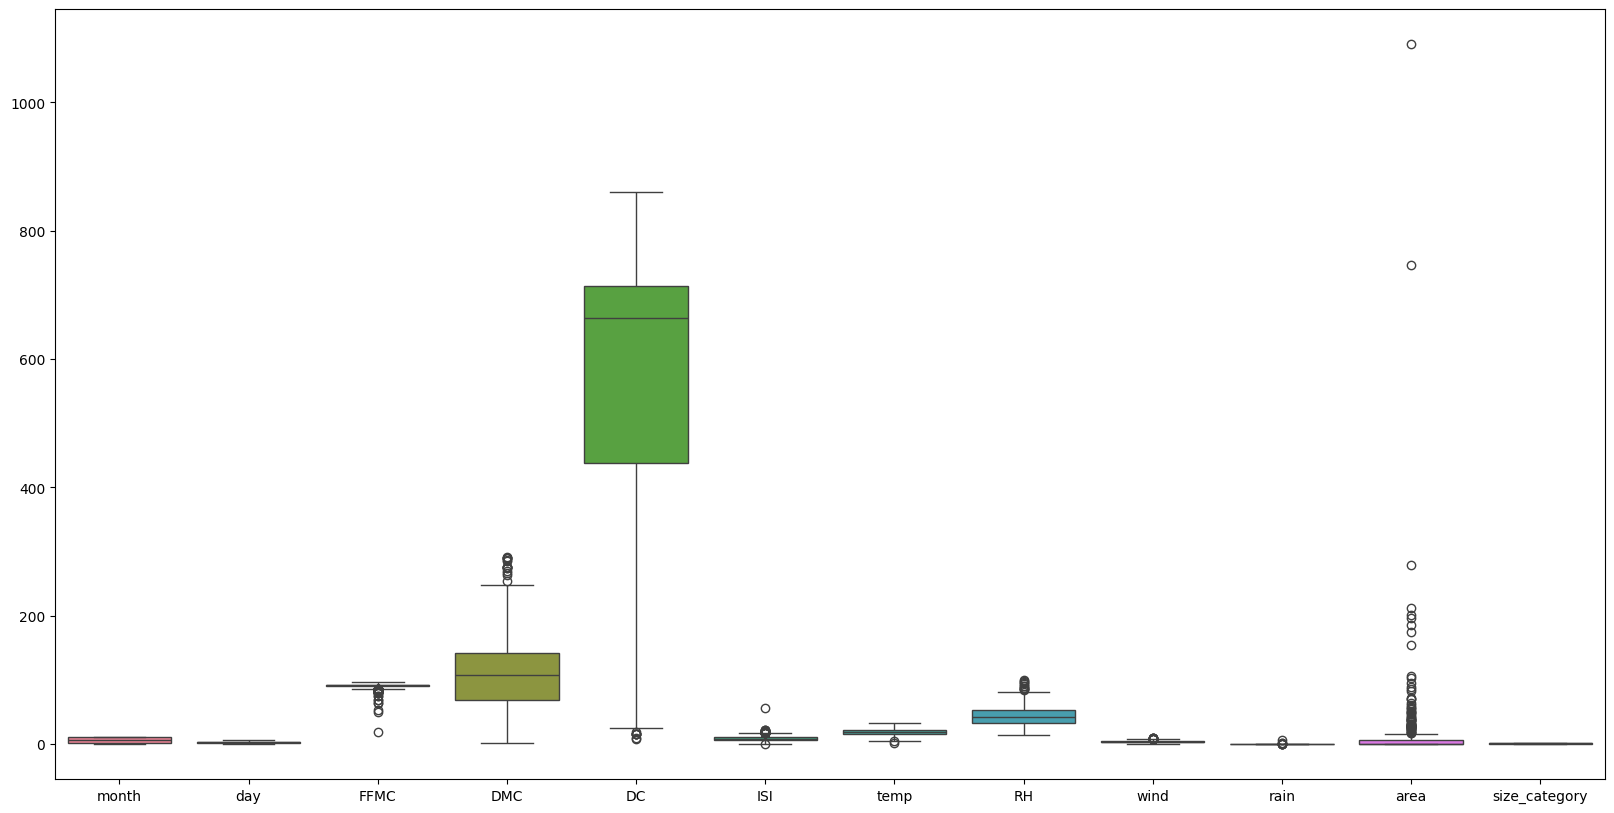

In [15]:
plt.figure(figsize=(20,10))
sns.boxplot(df)

In [16]:
df.corr()

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,size_category
month,1.000000,-0.150982,-0.007636,-0.173152,0.219439,-0.172087,-0.073802,-0.102057,-0.141131,-0.076800,0.031054,-0.032559
day,-0.150982,1.000000,0.074914,0.070218,0.058737,0.117738,0.148672,-0.103389,-0.034504,0.052881,0.018916,-0.003550
FFMC,-0.007636,0.074914,1.000000,0.382619,0.330512,0.531805,0.431532,-0.300995,-0.028485,0.056702,0.040122,-0.022063
DMC,-0.173152,0.070218,0.382619,1.000000,0.682192,0.305128,0.469594,0.073795,-0.105342,0.074790,0.072994,-0.034715
DC,0.219439,0.058737,0.330512,0.682192,1.000000,0.229154,0.496208,-0.039192,-0.203466,0.035861,0.049383,-0.019428
ISI,-0.172087,0.117738,0.531805,0.305128,0.229154,1.000000,0.394287,-0.132517,0.106826,0.067668,0.008258,0.008726
temp,-0.073802,0.148672,0.431532,0.469594,0.496208,0.394287,1.000000,-0.527390,-0.227116,0.069491,0.097844,-0.006021
RH,-0.102057,-0.103389,-0.300995,0.073795,-0.039192,-0.132517,-0.527390,1.000000,0.069410,0.099751,-0.075519,0.045243
wind,-0.141131,-0.034504,-0.028485,-0.105342,-0.203466,0.106826,-0.227116,0.069410,1.000000,0.061119,0.012317,-0.059113
rain,-0.076800,0.052881,0.056702,0.074790,0.035861,0.067668,0.069491,0.099751,0.061119,1.000000,-0.007366,-0.050001


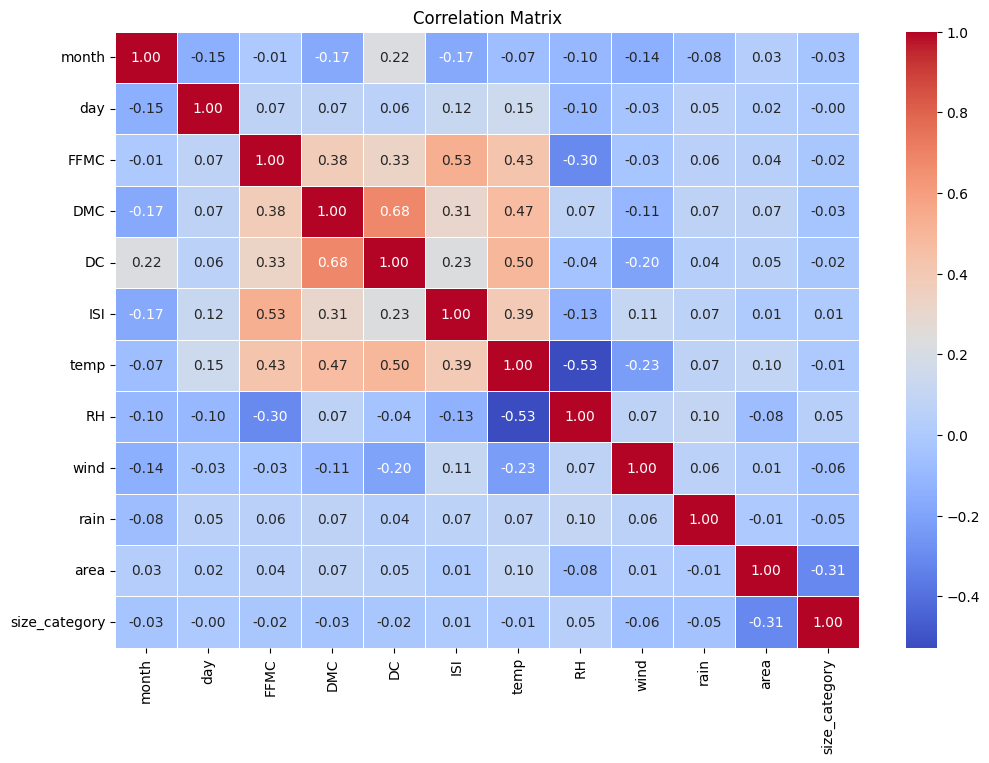

In [17]:
# Create a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()

In [18]:
from sklearn.model_selection import train_test_split
X = a
Y = b
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.3,random_state=42 )

Text(0.5, 1.0, 'T-SNE Visualization of forest-fire dataset')

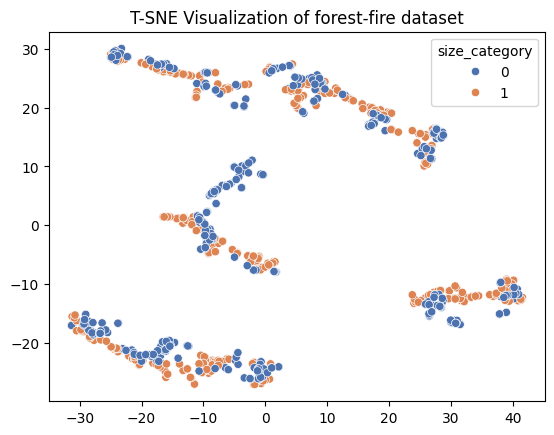

In [19]:
import seaborn as sns
from sklearn.manifold import TSNE

# Assuming 'a' is your data and 'b' is your labels
data_tsne_pca = TSNE(n_components=2).fit_transform(a)

# Assuming 'b' contains labels for coloring points
sns.scatterplot(x=data_tsne_pca[:,0], y=data_tsne_pca[:,1], hue=b, palette="deep").set_title('T-SNE Visualization of forest-fire dataset')


In [20]:
#use neural networks

In [21]:
# build model

In [22]:
import keras
keras.__version__

'2.15.0'

In [23]:
from keras.models import Sequential
from keras.layers import Dense, Input

# Define the input shape
input_shape = (11,)  # Change this to your actual input shape

# Create the model
model = Sequential()
model.add(Input(shape=input_shape))  # First layer with explicit input shape
model.add(Dense(14, kernel_initializer='uniform', activation='relu'))
model.add(Dense(12, kernel_initializer='uniform', activation='relu'))
model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))


In [24]:
# Compile model
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [25]:
# Fit the model
hist = model.fit(X_train, y_train, validation_split=0.33, epochs=30, batch_size=10)
#At epoch 25 itself our model reaches accuracy of 98% which maybe overfitting

Epoch 1/30
35/35 [==============================] - 1s 9ms/step - loss: 0.6936 - accuracy: 0.5246 - val_loss: 0.6905 - val_accuracy: 0.7018
Epoch 2/30
35/35 [==============================] - 0s 4ms/step - loss: 0.6883 - accuracy: 0.5826 - val_loss: 0.6788 - val_accuracy: 0.7485
Epoch 3/30
35/35 [==============================] - 0s 4ms/step - loss: 0.6625 - accuracy: 0.6696 - val_loss: 0.6079 - val_accuracy: 0.8363
Epoch 4/30
35/35 [==============================] - 0s 3ms/step - loss: 0.5920 - accuracy: 0.6696 - val_loss: 0.5123 - val_accuracy: 0.9064
Epoch 5/30
35/35 [==============================] - 0s 4ms/step - loss: 0.4865 - accuracy: 0.7971 - val_loss: 0.4249 - val_accuracy: 0.9240
Epoch 6/30
35/35 [==============================] - 0s 5ms/step - loss: 0.3849 - accuracy: 0.8928 - val_loss: 0.3108 - val_accuracy: 0.9708
Epoch 7/30
35/35 [==============================] - 0s 4ms/step - loss: 0.3095 - accuracy: 0.8957 - val_loss: 0.2713 - val_accuracy: 0.9532
Epoch 8/30
35/35 [==

In [26]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 14)                168       
                                                                 
 dense_1 (Dense)             (None, 12)                180       
                                                                 
 dense_2 (Dense)             (None, 1)                 13        
                                                                 
Total params: 361 (1.41 KB)
Trainable params: 361 (1.41 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [27]:
# model evaluation

In [28]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0820 - accuracy: 0.9730


[0.08198635280132294, 0.9729729890823364]

In [29]:
print(hist.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


In [30]:
import pandas as pd
hist_df=pd.DataFrame(hist.history)
hist_df['epoch']=hist.epoch
hist_df.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
25,0.185275,0.944928,0.053790,0.982456,25
26,0.035622,0.988406,0.052012,0.982456,26
27,0.030531,0.997101,0.073937,0.976608,27
28,0.038825,0.991304,0.105713,0.941520,28
29,0.070341,0.965217,0.102907,0.941520,29


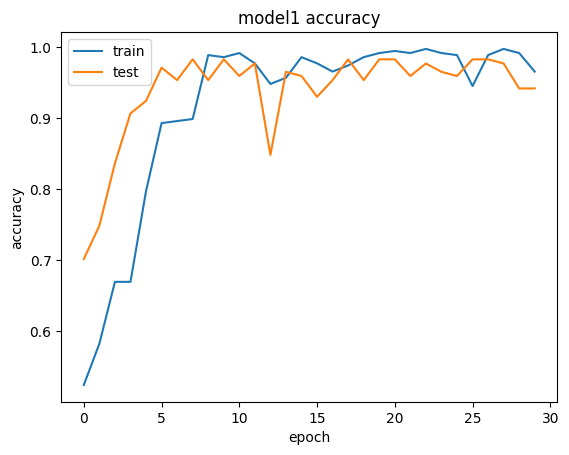

In [31]:
#visualizing training history

# summarize history for accuracy
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('model1 accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

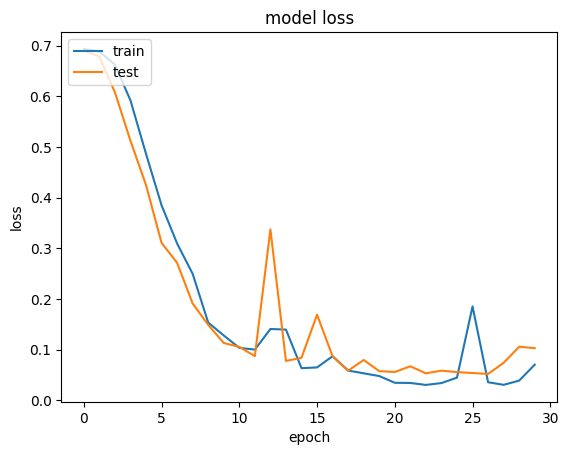

In [32]:
# summarize history for loss
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show() #Loss decreases and starts oscillating after 25


In [33]:
#hyperparameter tuning

In [34]:
#standardizing X values

In [35]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
X_ss = ss.fit_transform(X)

In [45]:
!pip install scikeras

In [46]:
# Importing the necessary packages
from sklearn.model_selection import GridSearchCV, KFold
from scikeras.wrappers import KerasClassifier
from keras.optimizers import Adam

In [47]:
#tuning 1 : batch size and epochs

In [48]:
# create model function
def create_model():
    model = Sequential()
    model.add(Dense(14, input_dim=11, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(12, kernel_initializer='uniform', activation='relu'))
    model.add(Dense(1, kernel_initializer='uniform', activation='sigmoid'))

    #adam=Adam(lr=0.01) #learning rate = 0.01
    # New (recommended)
    adam = Adam(learning_rate=0.01)
    model.compile(loss='binary_crossentropy', optimizer=adam, metrics=['accuracy'])
    return model

In [49]:
# Create the model
model = KerasClassifier(model = create_model,verbose = 0)
# Define the grid search parameters
batch_size = [10,20,40]
epochs = [10,25,50,100]
# Make a dictionary of the grid search parameters
param_grid = dict(batch_size = batch_size,epochs = epochs)
# Build and fit the GridSearchCV
grid = GridSearchCV(estimator = model,param_grid = param_grid,cv = KFold(),verbose = 10)
grid_result = grid.fit(X_ss,Y)

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START batch_size=10, epochs=10...................................
[CV 1/5; 1/12] END ....batch_size=10, epochs=10;, score=0.980 total time=   2.3s
[CV 2/5; 1/12] START batch_size=10, epochs=10...................................
[CV 2/5; 1/12] END ....batch_size=10, epochs=10;, score=0.959 total time=   2.3s
[CV 3/5; 1/12] START batch_size=10, epochs=10...................................
[CV 3/5; 1/12] END ....batch_size=10, epochs=10;, score=0.770 total time=   2.6s
[CV 4/5; 1/12] START batch_size=10, epochs=10...................................
[CV 4/5; 1/12] END ....batch_size=10, epochs=10;, score=0.925 total time=   2.3s
[CV 5/5; 1/12] START batch_size=10, epochs=10...................................
[CV 5/5; 1/12] END ....batch_size=10, epochs=10;, score=0.986 total time=   4.8s
[CV 1/5; 2/12] START batch_size=10, epochs=25...................................
[CV 1/5; 2/12] END ....batch_size=10, epochs=25;

In [50]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result.best_score_,grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
  print('{},{} with: {}'.format(mean, stdev, param))
#According to this, the best batch size is 20 and epochs is 50

Best : 0.9851351351351351, using {'batch_size': 40, 'epochs': 25}
0.9242048170619599,0.07986268966002745 with: {'batch_size': 10, 'epochs': 10}
0.9783599926457068,0.020664520711290775 with: {'batch_size': 10, 'epochs': 25}
0.9756205184776613,0.015776913870028043 with: {'batch_size': 10, 'epochs': 50}
0.8418183489612062,0.28306740626768595 with: {'batch_size': 10, 'epochs': 100}
0.9742875528589815,0.0315084551571108 with: {'batch_size': 20, 'epochs': 10}
0.9824140466997608,0.013234905523396559 with: {'batch_size': 20, 'epochs': 25}
0.9837653980511123,0.01454256249578357 with: {'batch_size': 20, 'epochs': 50}
0.9756480970766684,0.026199465845294305 with: {'batch_size': 20, 'epochs': 100}
0.9593583379297664,0.02874279287676265 with: {'batch_size': 40, 'epochs': 10}
0.9851351351351351,0.017825548592260685 with: {'batch_size': 40, 'epochs': 25}
0.9769902555616842,0.018926939758967257 with: {'batch_size': 40, 'epochs': 50}
0.9783416069130354,0.01678183872633677 with: {'batch_size': 40, 'epoc

In [51]:
# tuning 2: learning rate and dropout rate

In [59]:
from keras.layers import Dropout

# Defining the model

def create_model2(learning_rate,dropout_rate):
    model = Sequential()
    model.add(Dense(14,input_dim = 11,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(12,input_dim = 14,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,kernel_initializer='uniform',activation = 'sigmoid'))

    adam = Adam(learning_rate=learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model2 = KerasClassifier(model = create_model2,verbose = 0,batch_size = 20,epochs = 50, dropout_rate=0.0, learning_rate=0.001)

# Define the grid search parameters

learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]

# Make a dictionary of the grid search parameters

param_grids2 = dict(learning_rate = learning_rate,dropout_rate = dropout_rate)

# Build and fit the GridSearchCV

grid2 = GridSearchCV(estimator = model2,param_grid = param_grids2,cv = KFold(),verbose = 10)
grid_result2 = grid2.fit(X_ss,Y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 1/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.993 total time=   3.6s
[CV 2/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 2/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.986 total time=   3.5s
[CV 3/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 3/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.953 total time=   3.7s
[CV 4/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 4/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.986 total time=   3.2s
[CV 5/5; 1/9] START dropout_rate=0.0, learning_rate=0.001.......................
[CV 5/5; 1/9] END dropout_rate=0.0, learning_rate=0.001;, score=0.993 total time=   4.5s
[CV 1/5; 2/9] START dropout_rate=0.0, learning_rate=0.01........................
[CV 1/5; 

In [60]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result2.best_score_,grid_result2.best_params_))
means2 = grid_result2.cv_results_['mean_test_score']
stds2 = grid_result2.cv_results_['std_test_score']
params2 = grid_result2.cv_results_['params']
for mean, stdev, param in zip(means2, stds2, params2):
  print('{},{} with: {}'.format(mean, stdev, param))
#Best score for Dropout rate = 0.2 and learning rate is 0.001

Best : 0.9824048538334254, using {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9824048538334254,0.015157456045777482 with: {'dropout_rate': 0.0, 'learning_rate': 0.001}
0.9702334988049273,0.019390555476668115 with: {'dropout_rate': 0.0, 'learning_rate': 0.01}
0.9742967457253171,0.020664561606847473 with: {'dropout_rate': 0.0, 'learning_rate': 0.1}
0.9810259238830668,0.011642081989611966 with: {'dropout_rate': 0.1, 'learning_rate': 0.001}
0.9810351167494025,0.018858635956722568 with: {'dropout_rate': 0.1, 'learning_rate': 0.01}
0.9375436661150947,0.06645753432217995 with: {'dropout_rate': 0.1, 'learning_rate': 0.1}
0.9823864681007537,0.014571734189793937 with: {'dropout_rate': 0.2, 'learning_rate': 0.001}
0.9566188637617209,0.03395275884161521 with: {'dropout_rate': 0.2, 'learning_rate': 0.01}
0.896773303916161,0.09048860307663655 with: {'dropout_rate': 0.2, 'learning_rate': 0.1}


In [61]:
#tuning 3: activation function and kernel initializer

In [67]:
# Defining the model

def create_model3(activation_function,init):
    model = Sequential()
    model.add(Dense(14,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(12,input_dim = 14,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model3 = KerasClassifier(model = create_model3,verbose = 0,batch_size = 20,epochs = 50, activation_function = activation_function, init=init)

# Define the grid search parameters
activation_function = ['softmax','relu','tanh','linear']
init = ['uniform','normal','zero']

# Make a dictionary of the grid search parameters
param_grids3 = dict(activation_function = activation_function,init = init)

# Build and fit the GridSearchCV

grid3 = GridSearchCV(estimator = model3,param_grid = param_grids3,cv = KFold(),verbose = 10)
grid_result3 = grid3.fit(X_ss,Y)



Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 1/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 1/5; 1/12] END activation_function=softmax, init=uniform;, score=0.034 total time=   7.0s
[CV 2/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 2/5; 1/12] END activation_function=softmax, init=uniform;, score=0.797 total time=   3.6s
[CV 3/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 3/5; 1/12] END activation_function=softmax, init=uniform;, score=0.405 total time=   3.7s
[CV 4/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 4/5; 1/12] END activation_function=softmax, init=uniform;, score=0.483 total time=   5.0s
[CV 5/5; 1/12] START activation_function=softmax, init=uniform..................
[CV 5/5; 1/12] END activation_function=softmax, init=uniform;, score=0.048 total time=   3.4s
[CV 1/5; 2/12] START activation_function=softmax, init=normal...

In [68]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result3.best_score_,grid_result3.best_params_))
means3 = grid_result3.cv_results_['mean_test_score']
stds3 = grid_result3.cv_results_['std_test_score']
params3 = grid_result3.cv_results_['params']
for mean, stdev, param in zip(means3, stds3, params3):
  print('{},{} with: {}'.format(mean, stdev, param))
#best activation function in our case would be Relu and Kernel Initializer is Uniform

Best : 0.9878194521051664, using {'activation_function': 'relu', 'init': 'normal'}
0.3534197462768891,0.28712376567535913 with: {'activation_function': 'softmax', 'init': 'uniform'}
0.3576116933259791,0.25592570939588416 with: {'activation_function': 'softmax', 'init': 'normal'}
0.32498621070049644,0.2667468643309027 with: {'activation_function': 'softmax', 'init': 'zero'}
0.9837194337194337,0.013949804370284034 with: {'activation_function': 'relu', 'init': 'uniform'}
0.9878194521051664,0.0116269591228825 with: {'activation_function': 'relu', 'init': 'normal'}
0.20169148740577314,0.18266939496241255 with: {'activation_function': 'relu', 'init': 'zero'}
0.9783324140466998,0.01882558074966012 with: {'activation_function': 'tanh', 'init': 'uniform'}
0.9823772752344182,0.010992208232551598 with: {'activation_function': 'tanh', 'init': 'normal'}
0.20169148740577314,0.18266939496241255 with: {'activation_function': 'tanh', 'init': 'zero'}
0.9810351167494025,0.01881893579720258 with: {'activa

In [69]:
#tuning 4: number of neurons in activation layer

In [74]:
# Defining the model

def create_model4(neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = 0.001)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

model4 = KerasClassifier(model = create_model4,verbose = 0,batch_size = 20,epochs = 50, neuron1=4, neuron2=4)

# Define the grid search parameters

neuron1 = [4,8,14]
neuron2 = [4,8,12]

# Make a dictionary of the grid search parameters

param_grids4 = dict(neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid4 = GridSearchCV(estimator = model4,param_grid = param_grids4,cv = KFold(),verbose = 10)
grid_result4 = grid4.fit(X_ss, Y)


Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5; 1/9] START neuron1=4, neuron2=4........................................
[CV 1/5; 1/9] END .........neuron1=4, neuron2=4;, score=1.000 total time=   7.2s
[CV 2/5; 1/9] START neuron1=4, neuron2=4........................................
[CV 2/5; 1/9] END .........neuron1=4, neuron2=4;, score=0.973 total time=   6.7s
[CV 3/5; 1/9] START neuron1=4, neuron2=4........................................
[CV 3/5; 1/9] END .........neuron1=4, neuron2=4;, score=0.946 total time=   3.7s
[CV 4/5; 1/9] START neuron1=4, neuron2=4........................................
[CV 4/5; 1/9] END .........neuron1=4, neuron2=4;, score=0.986 total time=   3.6s
[CV 5/5; 1/9] START neuron1=4, neuron2=4........................................
[CV 5/5; 1/9] END .........neuron1=4, neuron2=4;, score=0.980 total time=   4.1s
[CV 1/5; 2/9] START neuron1=4, neuron2=8........................................
[CV 1/5; 2/9] END .........neuron1=4, neuron2=8;,

In [75]:
# Summarize the results
print('Best : {}, using {}'.format(grid_result4.best_score_,grid_result4.best_params_))
means4 = grid_result4.cv_results_['mean_test_score']
stds4 = grid_result4.cv_results_['std_test_score']
params4 = grid_result4.cv_results_['params']
for mean, stdev, param in zip(means4, stds4, params4):
  print('{},{} with: {}'.format(mean, stdev, param))

#Best results are Neuron 1 = 4 and Neuron 2 = 4

Best : 0.9864589078874794, using {'neuron1': 14, 'neuron2': 8}
0.9769810626953485,0.01791393179127579 with: {'neuron1': 4, 'neuron2': 4}
0.9538150395293252,0.03906221227925257 with: {'neuron1': 4, 'neuron2': 8}
0.9837286265857695,0.011799966952661903 with: {'neuron1': 4, 'neuron2': 12}
0.764690200404486,0.3848177633687181 with: {'neuron1': 8, 'neuron2': 4}
0.9810075381503953,0.01681300612511181 with: {'neuron1': 8, 'neuron2': 8}
0.9837470123184409,0.013914902615433555 with: {'neuron1': 8, 'neuron2': 12}
0.9714929214929215,0.03558366550474017 with: {'neuron1': 14, 'neuron2': 4}
0.9864589078874794,0.01130078127622804 with: {'neuron1': 14, 'neuron2': 8}
0.9783048354476925,0.018902911735459254 with: {'neuron1': 14, 'neuron2': 12}


In [76]:
#tuning 5: use all hyperparameters at once

In [77]:
#caution: running this code needs more computation power. not recommended to run on local system

In [78]:
'''def create_model5(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):
    model = Sequential()
    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))
    model.add(Dropout(dropout_rate))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(lr = learning_rate)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

# Create the model

#model5 = KerasClassifier(build_fn = create_model5,verbose = 0)

# Define the grid search parameters

batch_size = [10,20,40]
epochs = [10,50,100]
learning_rate = [0.001,0.01,0.1]
dropout_rate = [0.0,0.1,0.2]
activation_function = ['relu','tanh','linear'] #removing softmax since it is for multiclass
init = ['uniform','normal']
neuron1 = [4,8,16]
neuron2 = [2,4,8]

# Make a dictionary of the grid search parameters

param_grids5 = dict(batch_size = batch_size,epochs = epochs,learning_rate = learning_rate,dropout_rate = dropout_rate,
                   activation_function = activation_function,init = init,neuron1 = neuron1,neuron2 = neuron2)

# Build and fit the GridSearchCV

grid5 = GridSearchCV(estimator = model5,param_grid = param_grids5,cv = KFold(),verbose = 10)
grid_result5 = grid5.fit(X_standardized,Y)
'''
#This would take approx 15 hours to complete

"def create_model5(learning_rate,dropout_rate,activation_function,init,neuron1,neuron2):\n    model = Sequential()\n    model.add(Dense(neuron1,input_dim = 11,kernel_initializer = init,activation = activation_function))\n    model.add(Dropout(dropout_rate))\n    model.add(Dense(neuron2,input_dim = neuron1,kernel_initializer = init,activation = activation_function))\n    model.add(Dropout(dropout_rate))\n    model.add(Dense(1,activation = 'sigmoid'))\n    \n    adam = Adam(lr = learning_rate)\n    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])\n    return model\n\n# Create the model\n\n#model5 = KerasClassifier(build_fn = create_model5,verbose = 0)\n\n# Define the grid search parameters\n\nbatch_size = [10,20,40]\nepochs = [10,50,100]\nlearning_rate = [0.001,0.01,0.1]\ndropout_rate = [0.0,0.1,0.2]\nactivation_function = ['relu','tanh','linear'] #removing softmax since it is for multiclass\ninit = ['uniform','normal']\nneuron1 = [4,8,16]\nneuron2 = [2

In [79]:
#building final model

In [85]:
# Defining the model

def create_model_fnl():
    model = Sequential()
    model.add(Dense(4,input_dim = 11,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(4,input_dim = 4,kernel_initializer = 'uniform',activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(1,activation = 'sigmoid'))

    adam = Adam(learning_rate = 0.001) #sgd = SGD(lr=learning_rate, momentum=momentum, decay=decay_rate, nesterov=False)
    model.compile(loss = 'binary_crossentropy',optimizer = adam,metrics = ['accuracy'])
    return model

In [86]:
# Create the model
model_fnl = KerasClassifier(model = create_model_fnl,verbose = 0,batch_size = 20,epochs = 50)

In [87]:
#Making training and Testing Data
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X_ss,Y, test_size = 0.3)


In [88]:
# Fitting the model
hist2 = model_fnl.fit(X_train_1,y_train_1)

In [90]:
from sklearn.metrics import confusion_matrix,classification_report,ConfusionMatrixDisplay
def report_model(model):
    model_preds = model.predict(X_test_1)
    print(confusion_matrix(y_test_1,model_preds))
    print(classification_report(y_test_1,model_preds))


In [91]:
report_model(model_fnl)

[[102   2]
 [  1 117]]
              precision    recall  f1-score   support

           0       0.99      0.98      0.99       104
           1       0.98      0.99      0.99       118

    accuracy                           0.99       222
   macro avg       0.99      0.99      0.99       222
weighted avg       0.99      0.99      0.99       222

